# Notebook Tutorial for the Node2VecHiC package
## Introduction

Welcome to this tutorial for the **Node2VecHiC** package.

In this notebook, we will walk you through the process of using different classes and modules available in this repository. Let's get started by creating a fake dataset, which will be the foundation for our demonstration.

## Creation of fake datasets

At the moment, all the **Node2VecHiC** package relies on `.csv` files. In fact, we actually need to have two main objects in order to use this package:

- a `.csv` Metadata file
- a `.csv` Hi-C file

In [1]:
import pandas as pd
import numpy as np

np.random.seed(123) # for reproducibility

number_nodes = 300

# Metadata
metadata = {'chr': ['chr1', 'chr2', 'chr3', 'chr4'],
            'start': [1, 31, 101, 201,],
            'end': [30, 100, 200, number_nodes -1]} 
metadata = pd.DataFrame(metadata)
metadata.to_csv('metadata.csv',
                index = False)

# Hi-C
matrix = np.random.randint(low = 0,
                           high = 1000,
                           size = (number_nodes, number_nodes))
matrix = (matrix + matrix.T) // 2
np.fill_diagonal(matrix, 0)
hi_c = pd.DataFrame(matrix)
hi_c.to_csv('hic.csv',
            index = False,
            header = False)

We created a fake metadata file containing informations regarding three different chromosomes and 302 nodes. At the same time we created a fake Hi-C adjacency matrix. These are the results:

In [2]:
metadata

,chr,start,end
0,chr1,1,30
1,chr2,31,100
2,chr3,101,200
3,chr4,201,299


In [3]:
hi_c

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0,530,658,331,803,59,648,129,484,202,...,384,527,643,412,421,882,540,850,700,642
1,530,0,607,537,618,712,351,325,277,397,...,607,237,742,183,388,751,487,414,499,624
2,658,607,0,561,288,770,421,294,340,400,...,328,618,528,819,240,444,915,454,212,729
3,331,537,561,0,535,838,441,456,340,531,...,340,289,643,316,525,409,198,451,781,251
4,803,618,288,535,0,371,260,306,619,339,...,713,360,692,599,330,209,355,388,943,439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,882,751,444,409,209,399,459,581,316,665,...,329,757,606,869,593,0,793,636,633,618
296,540,487,915,198,355,419,260,570,487,350,...,508,407,473,401,253,793,0,566,223,541
297,850,414,454,451,388,503,766,299,867,513,...,443,162,628,591,951,636,566,0,444,245
298,700,499,212,781,943,280,218,623,333,535,...,818,612,786,381,856,633,223,444,0,605


## Use of Metadata and HiC classes

To define instances of these two classes, we need to import the classes and thereafter to define the path of the `.csv` file previously generated. 

In [4]:
from Node2VecHiC.metadata import Metadata
from Node2VecHiC.hic import HiC

METADATA_PATH = 'metadata.csv'
HIC_PATH = 'hic.csv'

metadata = Metadata(METADATA_PATH)
hic = HiC(metadata, HIC_PATH)

From these instances, we can recall many attributes:

In [5]:
metadata.data_frame

,chr,start,end
0,chr1,1,30
1,chr2,31,100
2,chr3,101,200
3,chr4,201,299


In [6]:
hic.data_frame

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0,530,658,331,803,59,648,129,484,202,...,384,527,643,412,421,882,540,850,700,642
1,530,0,607,537,618,712,351,325,277,397,...,607,237,742,183,388,751,487,414,499,624
2,658,607,0,561,288,770,421,294,340,400,...,328,618,528,819,240,444,915,454,212,729
3,331,537,561,0,535,838,441,456,340,531,...,340,289,643,316,525,409,198,451,781,251
4,803,618,288,535,0,371,260,306,619,339,...,713,360,692,599,330,209,355,388,943,439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,882,751,444,409,209,399,459,581,316,665,...,329,757,606,869,593,0,793,636,633,618
296,540,487,915,198,355,419,260,570,487,350,...,508,407,473,401,253,793,0,566,223,541
297,850,414,454,451,388,503,766,299,867,513,...,443,162,628,591,951,636,566,0,444,245
298,700,499,212,781,943,280,218,623,333,535,...,818,612,786,381,856,633,223,444,0,605


In [7]:
hic.attributes

{0: 'chr1',
 1: 'chr1',
 2: 'chr1',
 3: 'chr1',
 4: 'chr1',
 5: 'chr1',
 6: 'chr1',
 7: 'chr1',
 8: 'chr1',
 9: 'chr1',
 10: 'chr1',
 11: 'chr1',
 12: 'chr1',
 13: 'chr1',
 14: 'chr1',
 15: 'chr1',
 16: 'chr1',
 17: 'chr1',
 18: 'chr1',
 19: 'chr1',
 20: 'chr1',
 21: 'chr1',
 22: 'chr1',
 23: 'chr1',
 24: 'chr1',
 25: 'chr1',
 26: 'chr1',
 27: 'chr1',
 28: 'chr1',
 29: 'chr1',
 30: 'chr2',
 31: 'chr2',
 32: 'chr2',
 33: 'chr2',
 34: 'chr2',
 35: 'chr2',
 36: 'chr2',
 37: 'chr2',
 38: 'chr2',
 39: 'chr2',
 40: 'chr2',
 41: 'chr2',
 42: 'chr2',
 43: 'chr2',
 44: 'chr2',
 45: 'chr2',
 46: 'chr2',
 47: 'chr2',
 48: 'chr2',
 49: 'chr2',
 50: 'chr2',
 51: 'chr2',
 52: 'chr2',
 53: 'chr2',
 54: 'chr2',
 55: 'chr2',
 56: 'chr2',
 57: 'chr2',
 58: 'chr2',
 59: 'chr2',
 60: 'chr2',
 61: 'chr2',
 62: 'chr2',
 63: 'chr2',
 64: 'chr2',
 65: 'chr2',
 66: 'chr2',
 67: 'chr2',
 68: 'chr2',
 69: 'chr2',
 70: 'chr2',
 71: 'chr2',
 72: 'chr2',
 73: 'chr2',
 74: 'chr2',
 75: 'chr2',
 76: 'chr2',
 77: 'chr

## Run algorithms

At the moment, we can run two different algorithms:
- node2vec
- pca

To run the node2vec algorithm, we need to import the function `run_node2vec`; then we need to arbitrarily define the following parameters, and thereafter pack them into a list. It is mandatory to also define an `embeddings_path`, that will save the learned embeddings in  `.csv`.

In [8]:
from Node2VecHiC.algorithms import run_node2vec

EMBEDDINGS_PATH = 'embeddings.csv'

# Node2Vec parameters
N_DIMENSIONS = 4
WALK_LENGTH = 50
NUM_WALKS = 4
WEIGHT_KEY = 'weight'
WORKERS = 1
P = 1
Q = 0.5

parameters = [N_DIMENSIONS, WALK_LENGTH, NUM_WALKS, WEIGHT_KEY, WORKERS, P, Q,]

hic_graph = hic.graph
embeddings, indexes = run_node2vec(hic_graph,
                                   parameters,
                                   EMBEDDINGS_PATH)


Generating walks (CPU: 1): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]


To run the pca algorithm, we need to import the `run_pca` function and then define the number of principal components:

In [9]:
from Node2VecHiC.algorithms import run_pca

#PCA
N_COMPONENTS = 2

principal_df = run_pca(data_frame = embeddings,
                       n_components = N_COMPONENTS)

# Plot

To visualize the result, we just need to import the `Graphics` class. The function `get_plot_chromosome()` will give us a visualization of the extracted principal components dataset.

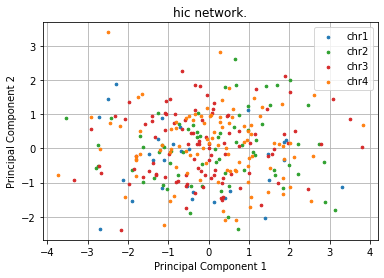

In [10]:
from Node2VecHiC.graphics import Graphics

hic_graphics = Graphics(hic)
hic_graphics.get_plot_chromosome(principal_df)

When interpreting the data in this context, it's important to qualitatively assess the potential presence or absence of clusters. In this particular case, we do not observe the formation of distinct clusters, leading us to infer the likely presence of chromosome translocations.

## Blocks Graph

If one would like to isolate the different chromosomes, it is possible to isolate nodes using a combination of the `get_block_graph()` method of the `HiC` class. With this method we obtain a list of different graphs, related to all the possible combination of chromosome couples.

At the moment, this method works with the variable `selected_chromosome = 1` associated with the chromosome `chr2` in the specific case of the fake dataset used. This mean that the output graph list will be composed by three graphs:
 
$$
\left[ G(\text{chr}_2, \text{chr}_1), G(\text{chr}_2, \text{chr}_3), G(\text{chr}_2, \text{chr}_4) \right]
$$

where $ G(\text{chr}_i, \text{chr}_j) $ is the graph containing just the index nodes associated with chromosome $i$ and chromosome $j$.

Then, the idea is to run the node2vec algorithm and the pca as before, on these new graphs structure:

In [11]:
graph_block_lists = hic.get_block_graph()

EMBEDDINGS_chr2_chr1 = 'embeddings_chr2_chr1.csv'
EMBEDDINGS_chr2_chr3 = 'embeddings_chr2_chr3.csv'
EMBEDDINGS_chr2_chr4 = 'embeddings_chr2_chr4.csv'

embeddings_path_block = [EMBEDDINGS_chr2_chr1, EMBEDDINGS_chr2_chr3, EMBEDDINGS_chr2_chr4]
embeddings = []

for idx, graph in enumerate(graph_block_lists):
    embeddings_found, _ = run_node2vec(graph,
                                       parameters,
                                       embeddings_path_block[idx])
    embeddings.append(embeddings_found)

block = []
selected_chromosome = 1 #chr2
for model in embeddings:
    principal_df = run_pca(data_frame = model,
                           n_components = N_COMPONENTS)
    block.append(principal_df)

Generating walks (CPU: 1): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]


## Blocks plot

To visualize the blocks result, use the `get_plot_blocks()` method of the `Graphics` class.

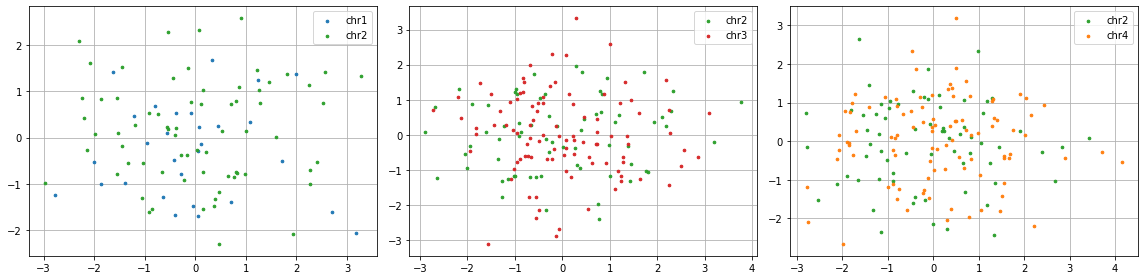

In [13]:
hic_graphics.get_plot_blocks(block, selected_chromosome, save = False)

In this case, we could hypothesize chromosome translocations, as we do not visually observe the presence of clusters.

However, it must be noted that this blocks method is purely experimental. The primary goal of this procedure was to investigate the feasibility of refining the method for tracing chromosome translocations in the most challenging cases where they were not detectable using the traditional approach of applying algorithms to the entire structure of the initial graph.